In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns



In [2]:
cp=pd.read_csv('cp.csv')
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [3]:
cp

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


#features detail
1. N nitrogen ratio in the soil
2. K potassium ratio in the soil
3. P phosphurous ratio in the soil
4. Temperature in the Celsius 
5. humidity in the %
6. ph value in the soil
7. raonfall in the mm
8. label value as per the prediction

In [4]:
#printing of the labels
cp['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [5]:
X=cp.drop('label', axis=1)
y=cp['label']

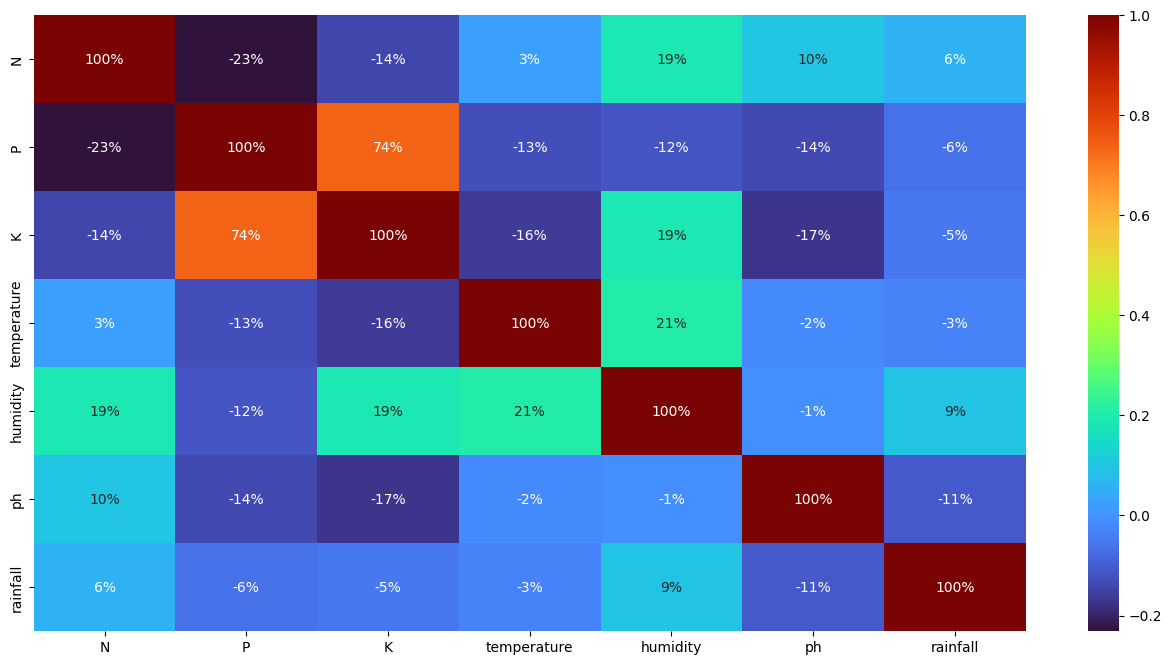

In [6]:
#maping of the heatmap
plt.figure(figsize=(16,8))
sns.heatmap(X.corr(), annot=True, cmap='turbo', fmt = '.0%')
plt.show()

<Figure size 1600x800 with 0 Axes>

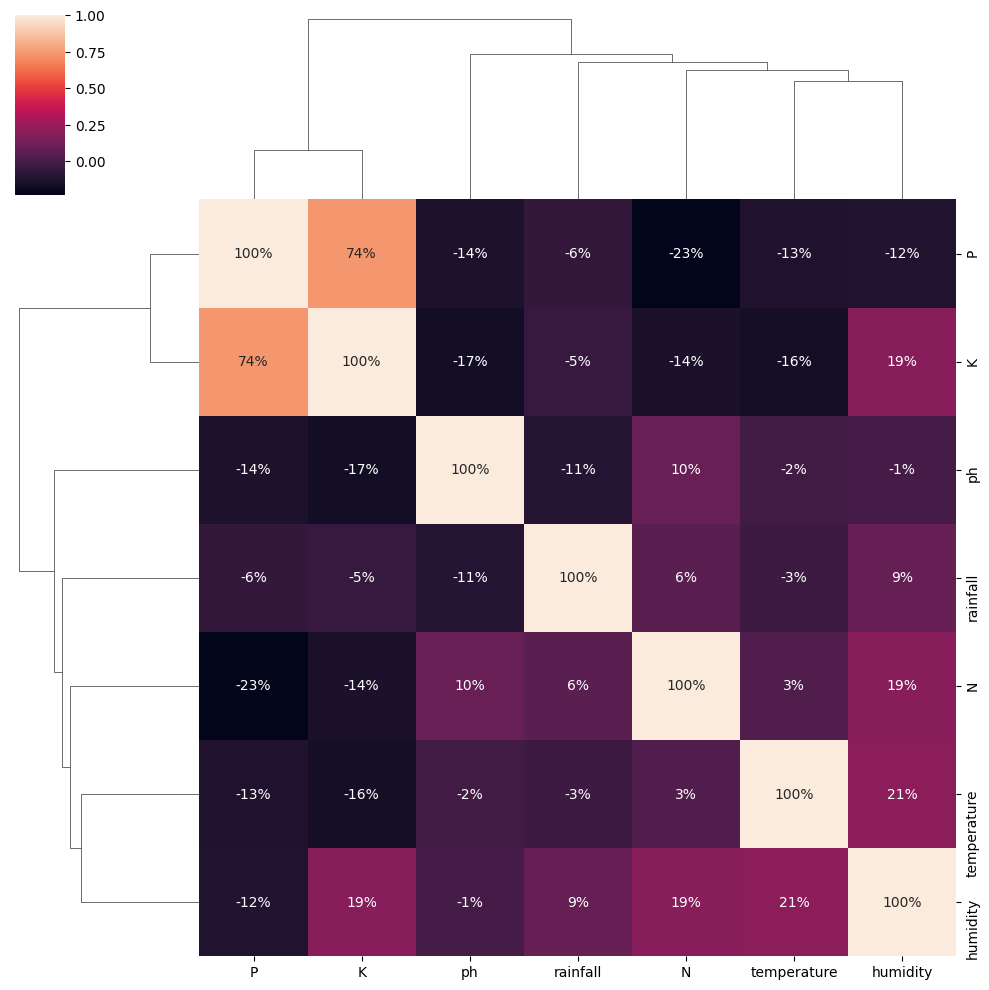

In [7]:
plt.figure(figsize=(16,8))
sns.clustermap(X.corr(), annot=True, fmt = '.0%')
plt.show()

In [8]:
# pd.DataFrame(index='index',
#             column =cp.drop())
cp.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
pd.pivot_table(cp,index='label', 
              columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'])

label
apple
banana
blackgram
chickpea
coconut
coffee
cotton
grapes
jute
kidneybeans


In [10]:
from sklearn.model_selection import train_test_split


In [11]:
X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [12]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1760, 7), (440, 7), (1760,), (440,))

In [13]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [15]:
log_clf=LogisticRegression()
log_clf.fit(X_train, Y_train)

c:\Users\priya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
y_pred=log_clf.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
print("accuracy score is :- ", accuracy_score(Y_test, y_pred)*100)

accuracy score is :-  94.54545454545455


In [19]:
import pickle as pkl
pkl.dump(log_clf, open("log_clf.pkl", "wb"))

In [20]:
from lightgbm import LGBMClassifier

In [21]:
lgb = LGBMClassifier()
lgb.fit(X_train, Y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1338
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.169004
[LightGBM] [Info] Start training from score -3.182610
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.018722
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -2.984433
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.078620
[LightGBM] 

LGBMClassifier()

In [22]:
lgb_pred = lgb.predict(X_test)
lgb_pred

array(['muskmelon', 'watermelon', 'papaya', 'papaya', 'apple', 'mango',
       'apple', 'mothbeans', 'mungbean', 'lentil', 'blackgram', 'coconut',
       'pomegranate', 'jute', 'coconut', 'pomegranate', 'apple', 'maize',
       'papaya', 'muskmelon', 'coffee', 'papaya', 'orange', 'papaya',
       'chickpea', 'jute', 'mungbean', 'orange', 'pigeonpeas', 'rice',
       'pomegranate', 'mothbeans', 'jute', 'lentil', 'jute', 'blackgram',
       'jute', 'chickpea', 'chickpea', 'kidneybeans', 'papaya', 'mango',
       'blackgram', 'maize', 'mungbean', 'maize', 'pigeonpeas', 'coconut',
       'muskmelon', 'maize', 'blackgram', 'coffee', 'grapes', 'mungbean',
       'coffee', 'kidneybeans', 'cotton', 'apple', 'banana', 'blackgram',
       'watermelon', 'coconut', 'lentil', 'orange', 'papaya', 'lentil',
       'orange', 'rice', 'muskmelon', 'pigeonpeas', 'muskmelon',
       'coconut', 'jute', 'banana', 'blackgram', 'papaya', 'banana',
       'cotton', 'watermelon', 'orange', 'coffee', 'chickpea',

In [23]:
accuracy_score(Y_test, lgb_pred)*100

98.63636363636363

In [24]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier()


In [25]:
cat.fit(X_train, Y_train)

Learning rate set to 0.081441
0:	learn: 2.5060563	total: 190ms	remaining: 3m 10s
1:	learn: 2.1497560	total: 230ms	remaining: 1m 54s
2:	learn: 1.8879731	total: 265ms	remaining: 1m 28s
3:	learn: 1.6899593	total: 307ms	remaining: 1m 16s
4:	learn: 1.5132866	total: 343ms	remaining: 1m 8s
5:	learn: 1.3842046	total: 375ms	remaining: 1m 2s
6:	learn: 1.2586241	total: 401ms	remaining: 56.9s
7:	learn: 1.1651460	total: 427ms	remaining: 53s
8:	learn: 1.0704173	total: 455ms	remaining: 50.1s
9:	learn: 0.9925385	total: 482ms	remaining: 47.7s
10:	learn: 0.9204733	total: 512ms	remaining: 46s
11:	learn: 0.8629064	total: 649ms	remaining: 53.4s
12:	learn: 0.7993477	total: 968ms	remaining: 1m 13s
13:	learn: 0.7503284	total: 1.27s	remaining: 1m 29s
14:	learn: 0.7064553	total: 1.56s	remaining: 1m 42s
15:	learn: 0.6650101	total: 1.78s	remaining: 1m 49s
16:	learn: 0.6260001	total: 2.19s	remaining: 2m 6s
17:	learn: 0.5921954	total: 2.51s	remaining: 2m 17s
18:	learn: 0.5581745	total: 2.84s	remaining: 2m 26s
19:	l

In [26]:
cat_pred = cat.predict(X_test)

In [27]:
accuracy_score(Y_test, cat_pred)*100

98.86363636363636

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [29]:
svm_clf = SVC(kernel='linear', random_state=42)  # Create an SVM model
svm_clf.fit(X_train, Y_train)  # Train the model
y_pred_svm = svm_clf.predict(X_test)  # Make predictions

# Calculate the accuracy
svm_accuracy = accuracy_score(Y_test, y_pred_svm) * 100
print(f"SVM Accuracy: {svm_accuracy:.2f}%")

SVM Accuracy: 97.95%


In [30]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, Y_train)


c:\Users\priya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [31]:
y_pred_lr = logistic_model.predict(X_test)


In [32]:
import lightgbm as lgb

# Initialize and train the LightGBM model
lgbm_model = lgb.LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, Y_train)

# Generate predictions
y_pred_lgbm = lgbm_model.predict(X_test)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1338
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.169004
[LightGBM] [Info] Start training from score -3.182610
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.018722
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -2.984433
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.078620
[LightGBM] 

In [33]:
from sklearn.svm import SVC

# Train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, Y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)


In [34]:
from catboost import CatBoostClassifier

# Train the CatBoost model
catboost_model = CatBoostClassifier(verbose=0, random_state=42)
catboost_model.fit(X_train, Y_train)

# Make predictions
y_pred_catboost = catboost_model.predict(X_test)


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [38]:
# Calculate metrics
metrics = {
    "Accuracy": [
        accuracy_score(Y_test, y_pred_lr),
        accuracy_score(Y_test, y_pred_lgbm),
        accuracy_score(Y_test, y_pred_svm),
        accuracy_score(Y_test, y_pred_catboost),
    ],
    "Precision": [
        precision_score(Y_test, y_pred_lr, average="weighted"),
        precision_score(Y_test, y_pred_lgbm, average="weighted"),
        precision_score(Y_test, y_pred_svm, average="weighted"),
        precision_score(Y_test, y_pred_catboost, average="weighted"),
    ],
    "Recall": [
        recall_score(Y_test, y_pred_lr, average="weighted"),
        recall_score(Y_test, y_pred_lgbm, average="weighted"),
        recall_score(Y_test, y_pred_svm, average="weighted"),
        recall_score(Y_test, y_pred_catboost, average="weighted"),
    ],
    "F1 Score": [
        f1_score(Y_test, y_pred_lr, average="weighted"),
        f1_score(Y_test, y_pred_lgbm, average="weighted"),
        f1_score(Y_test, y_pred_svm, average="weighted"),
        f1_score(Y_test, y_pred_catboost, average="weighted"),
    ],
}

# Create DataFrame for metrics
metrics_df = pd.DataFrame(metrics, index=["Logistic Regression", "LightGBM", "SVM", "CatBoost"])

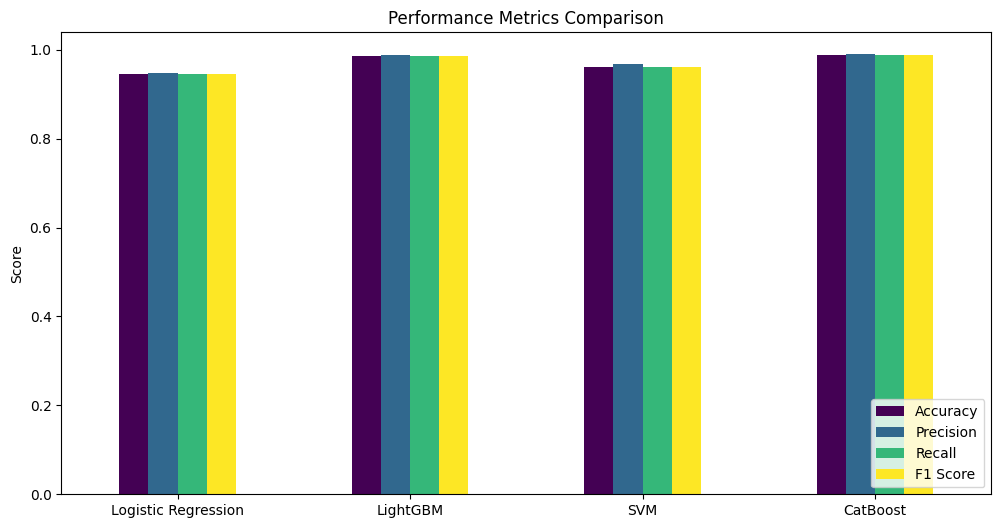

In [39]:
# Plot metrics
metrics_df.plot(kind="bar", figsize=(12, 6), colormap="viridis")
plt.title("Performance Metrics Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()
